In [2]:
import gym
import gym_classics
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [212]:
env = gym.make("5Walk-v0")
V = np.array([0.5]*5) 
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

params = {
    'alpha': 0.05,
    'gamma': 0.99,
}

rms_list = []
EPISODES = 100
for i in range(1, EPISODES + 1):
    done = False
    state = env.reset()
    while not done:
        action = env.action_space.sample()
        next_state, reward, done, info = env.step(action)

        if done:
            V[state] += params['alpha'] * (reward - V[state])
        else:
            V[state] += params['alpha'] * (reward + params['gamma'] * V[next_state] - V[state])
        state = next_state

        rms = np.sqrt(np.mean((V-true_values)**2))
        rms_list.append(rms)

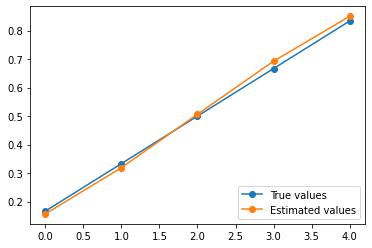

In [213]:
plt.plot(true_values, marker='o', label='True values')
plt.plot(V, marker='o', label='Estimated values')
leg = plt.legend(loc='lower right')
plt.show()

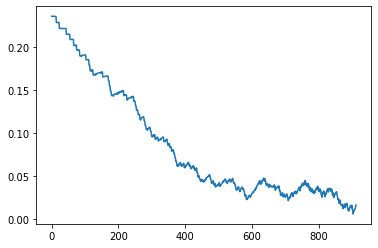

In [214]:
plt.plot(rms_list)
plt.show()

In [226]:
def run_episodes(n_episodes=100, alpha=0.05, gamma=0.99):
    env = gym.make("5Walk-v0")
    V = np.array([0.5]*5) 
    true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

    rms_list = []
    for i in range(1, n_episodes + 1):
        done = False
        state = env.reset()
        rms_sum = 0
        episode_len = 0
        while not done:
            action = env.action_space.sample()
            next_state, reward, done, info = env.step(action)

            if done:
                V[state] += alpha * (reward - V[state])
            else:
                V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            state = next_state

            rms = np.sqrt(np.mean((V-true_values)**2))
            rms_sum += rms
            episode_len += 1
        rms_list.append(rms_sum/episode_len)
    
    return rms_list

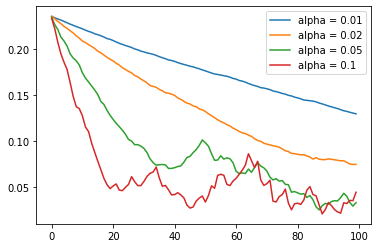

In [227]:
for alpha in [0.01, 0.02, 0.05, 0.1]:
    plt.plot(run_episodes(alpha=alpha), label=f'alpha = {alpha}')
leg = plt.legend(loc='upper right')
plt.show()

In [27]:
env = gym.make("19Walk-v0")
V = np.array([0.0]*19) 
true_values_list = []
for i in range(1,20):
    true_values_list.append(i/10-1)
true_values = np.array(true_values_list)

params = {
    'alpha': 0.05,
    'gamma': 0.99,
}

rms_list = []
EPISODES = 300
for i in range(1, EPISODES + 1):
    done = False
    state = env.reset()
    rms_sum = 0
    episode_len = 0
    while not done:
        action = env.action_space.sample()
        next_state, reward, done, info = env.step(action)

        if done:
            V[state] += params['alpha'] * (reward - V[state])
        else:
            V[state] += params['alpha'] * (reward + params['gamma'] * V[next_state] - V[state])
        state = next_state

        rms = np.sqrt(np.mean((V-true_values)**2))
        rms_sum += rms
        episode_len += 1
    rms_list.append(rms_sum/episode_len)

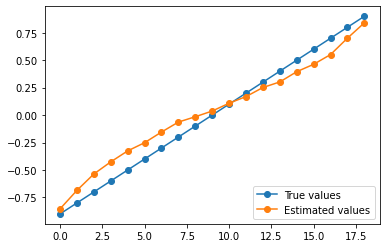

In [28]:
plt.plot(true_values, marker='o', label='True values')
plt.plot(V, marker='o', label='Estimated values')
leg = plt.legend(loc='lower right')
plt.show()

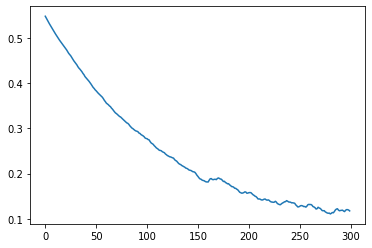

In [29]:
plt.plot(rms_list)
plt.show()